In [2]:
words = open('names.txt', 'r').read().splitlines()
words


['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn',
 'abigail',
 'emily',
 'elizabeth',
 'mila',
 'ella',
 'avery',
 'sofia',
 'camila',
 'aria',
 'scarlett',
 'victoria',
 'madison',
 'luna',
 'grace',
 'chloe',
 'penelope',
 'layla',
 'riley',
 'zoey',
 'nora',
 'lily',
 'eleanor',
 'hannah',
 'lillian',
 'addison',
 'aubrey',
 'ellie',
 'stella',
 'natalie',
 'zoe',
 'leah',
 'hazel',
 'violet',
 'aurora',
 'savannah',
 'audrey',
 'brooklyn',
 'bella',
 'claire',
 'skylar',
 'lucy',
 'paisley',
 'everly',
 'anna',
 'caroline',
 'nova',
 'genesis',
 'emilia',
 'kennedy',
 'samantha',
 'maya',
 'willow',
 'kinsley',
 'naomi',
 'aaliyah',
 'elena',
 'sarah',
 'ariana',
 'allison',
 'gabriella',
 'alice',
 'madelyn',
 'cora',
 'ruby',
 'eva',
 'serenity',
 'autumn',
 'adeline',
 'hailey',
 'gianna',
 'valentina',
 'isla',
 'eliana',
 'quinn',
 'nevaeh',
 'ivy',
 'sadie',
 'piper',
 'lydia',
 'alexa',
 'josephine',
 'emery',
 'julia'

In [16]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(stoi)
print(itos)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [8]:
# create the training set of bigrams (,y)
xs, ys = [], []

for w in words[:1]:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1, ch2)
        xs.append(ix1)
        ys.append(ix2)

import torch
xs = torch.tensor(xs)
ys = torch.tensor(ys)

. e
e m
m m
m a
a .


In [9]:
xs

tensor([ 0,  5, 13, 13,  1])

In [10]:
ys

tensor([ 5, 13, 13,  1,  0])

In [18]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [19]:
xenc.shape

torch.Size([5, 27])

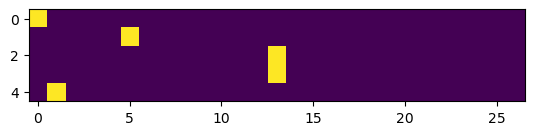

In [15]:
import matplotlib.pyplot as plt
plt.imshow(xenc)

In [20]:
xenc.dtype

torch.float32

In [23]:
W = torch.randn((27,27))
xenc @ W

tensor([[-0.1771, -0.8154, -0.7718,  0.1113,  1.2533, -1.6309, -1.1893, -0.8770,
          0.6799, -0.3904, -0.4772,  0.3637,  0.2424,  0.6280,  0.6457, -2.0524,
         -0.7037, -0.0952,  1.1681,  0.0970, -0.1279,  0.0232, -0.3957, -1.2176,
         -0.3001,  0.2589, -1.1666],
        [ 1.6591, -1.0190,  0.0980, -0.0409, -1.3074, -1.1434,  0.0375, -2.2541,
         -1.1738,  0.9243,  1.3343, -1.0528,  0.5719,  0.0420, -0.4061, -0.1914,
          1.5071,  0.9478,  0.8063,  0.1536,  0.2013, -2.2267, -0.4664,  0.5901,
          1.1693,  1.1374, -0.3353],
        [-0.2589,  0.4645, -0.4402,  0.5617, -0.9246, -0.1507, -0.0738,  1.5839,
          0.3845,  1.6325, -0.2501,  0.0213,  1.1921, -0.9212, -0.1399,  0.3882,
          0.2745,  0.0261, -0.4014, -1.0106, -1.2554,  2.3181, -2.1295, -0.6648,
         -0.5177,  0.2317, -0.2956],
        [-0.2589,  0.4645, -0.4402,  0.5617, -0.9246, -0.1507, -0.0738,  1.5839,
          0.3845,  1.6325, -0.2501,  0.0213,  1.1921, -0.9212, -0.1399,  0.3882

In [30]:
logits = xenc @ W # log counts
counts = logits.exp() # equvalent to the N matrix
probs = counts / counts.sum(1, keepdims=True)
probs[0].sum()

tensor(1.0000)

In [31]:
probs.shape

torch.Size([5, 27])

In [ ]:
# Summary ------------------------------------------>>>>>>>>>>>

In [32]:
xs

tensor([ 0,  5, 13, 13,  1])

In [33]:
ys

tensor([ 5, 13, 13,  1,  0])

In [46]:
# randomly initialize 27 neurons' weights, each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [52]:
# forward pass
xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'
loss = - probs[torch.arange(5), ys].log().mean()
loss

tensor(3.7492, grad_fn=<NegBackward0>)

In [53]:
# backward pass
W.grad = None # set to zero
loss.backward()

In [54]:
W.grad


tensor([[ 0.0121,  0.0020,  0.0025,  0.0008,  0.0034, -0.1975,  0.0005,  0.0046,
          0.0027,  0.0063,  0.0016,  0.0056,  0.0018,  0.0016,  0.0100,  0.0474,
          0.0121,  0.0005,  0.0050,  0.0011,  0.0068,  0.0022,  0.0006,  0.0040,
          0.0024,  0.0307,  0.0292],
        [-0.1969,  0.0017,  0.0079,  0.0020,  0.0121,  0.0062,  0.0217,  0.0026,
          0.0025,  0.0010,  0.0205,  0.0017,  0.0197,  0.0022,  0.0046,  0.0041,
          0.0082,  0.0016,  0.0180,  0.0106,  0.0093,  0.0062,  0.0010,  0.0066,
          0.0131,  0.0101,  0.0018],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000

In [51]:
W.data += -0.1 * W.grad

In [44]:
# Now reorganize ---------------------------------------------------->>>>>>>>>>>>>>>>>>>>>>>>>>>


tensor(3.7693)

In [68]:
# create the training set of bigrams (x,y)
xs, ys = [], []
for w in words:
    chs = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(chs,chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples:', num)

# initialize the network
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples: 228146


In [71]:
# gradient descent
for k in range(100):

    # forward pass
    xenc = F.one_hot(xs, num_classes=27).float() # input to the network: one-hot encoding
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # btw: the last 2 lines here are together called a 'softmax'
    loss = - probs[torch.arange(num), ys].log().mean() # + 0.01*(W**2).mean()
    print(loss.item())
    
    # backward pass
    W.grad = None # set to zero
    loss.backward()
    
    # update
    W.data += -50 * W.grad

2.4623453617095947
2.462298631668091
2.462252140045166
2.4622061252593994
2.46216082572937
2.462116003036499
2.462071657180786
2.4620275497436523
2.461984157562256
2.4619410037994385
2.4618983268737793
2.4618561267852783
2.4618144035339355
2.461773157119751
2.4617323875427246
2.4616918563842773
2.4616518020629883
2.4616122245788574
2.4615728855133057
2.461534023284912
2.4614953994750977
2.4614572525024414
2.4614193439483643
2.4613819122314453
2.4613451957702637
2.461308240890503
2.4612720012664795
2.461236000061035
2.461199998855591
2.461164951324463
2.461129903793335
2.461095094680786
2.4610607624053955
2.461026668548584
2.4609932899475098
2.4609594345092773
2.4609262943267822
2.460893392562866
2.4608612060546875
2.4608287811279297
2.46079683303833
2.4607653617858887
2.4607341289520264
2.460702896118164
2.460671901702881
2.460641384124756
2.460610866546631
2.460580587387085
2.4605507850646973
2.460521697998047
2.4604923725128174
2.460463047027588
2.4604344367980957
2.4604058265686035


In [73]:
# finallly sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)
for i in range(5):

    out = []
    ix = 0
    while True:
        xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)

        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        out.append(itos[ix])
        if ix == 0:
            break
    print(''.join(out))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
